# STOCK PRICE PREDICTOR

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [18]:
stocks=input("Enter the code of the stocks:-")
data=yf.download(stocks,"2010-01-01","2022-01-01",auto_adjust=True)
data.head()

Enter the code of the stocks:-MSFT
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,23.772841,23.780514,23.389160,23.389160,31929700
2010-01-04,23.496588,23.864921,23.473567,23.749817,38409100
2010-01-05,23.673076,23.864916,23.511929,23.757484,49749600
2010-01-06,23.696086,23.849558,23.419837,23.611677,58182400
2010-01-07,23.504253,23.557969,23.166615,23.366129,50559700


In [19]:
data.shape

(3022, 5)

In [20]:
data.describe()

,Open,High,Low,Close,Volume
count,3022.000000,3022.000000,3022.000000,3022.000000,3.022000e+03
mean,81.190056,81.939019,80.424094,81.230491,3.857369e+07
std,77.034918,77.759697,76.311207,77.094737,2.200323e+07
min,17.881536,18.059654,17.602741,17.819590,7.425600e+06
25%,25.085732,25.298262,24.848022,25.082762,2.390800e+07
50%,46.570405,47.022880,46.063208,46.612020,3.278110e+07
75%,105.516223,106.647209,104.358131,105.599121,4.820708e+07
max,342.383000,347.400238,339.978746,340.882812,3.193179e+08


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3022 entries, 2009-12-31 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3022 non-null   float64
 1   High    3022 non-null   float64
 2   Low     3022 non-null   float64
 3   Close   3022 non-null   float64
 4   Volume  3022 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.7 KB


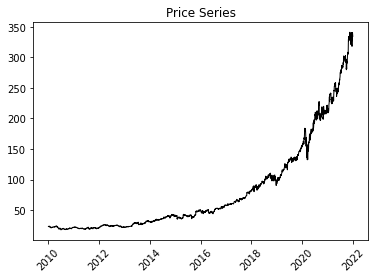

In [22]:
plt.plot(data['Close'],linewidth=1,color='k')
plt.title("Price Series")
plt.xticks(rotation=45)
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_23496\3078682262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Open'])


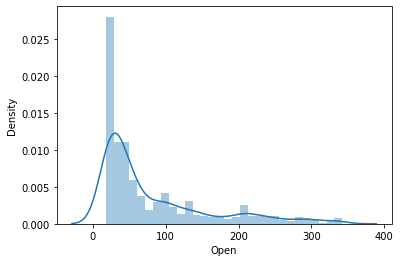

In [23]:
sns.distplot(data['Open'])
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_23496\1233806160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'])


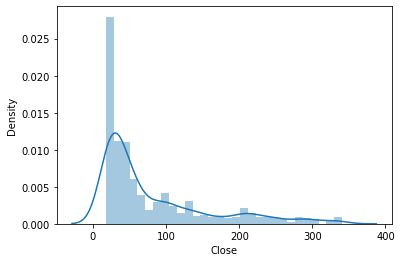

In [24]:
sns.distplot(data['Close'])
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_23496\1727852131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Low'])


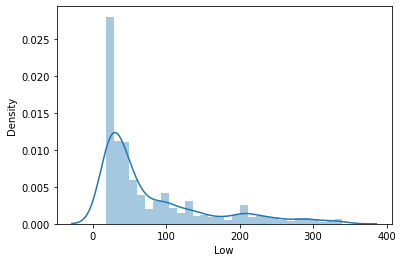

In [25]:
sns.distplot(data['Low'])
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_23496\1585171176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['High'])


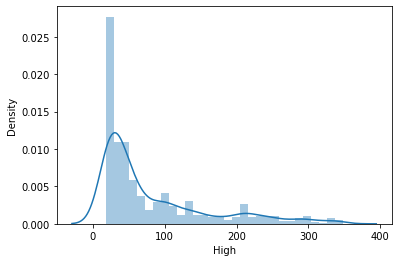

In [26]:
sns.distplot(data['High'])
plt.show()

In [27]:
x=data.drop('Close',axis=1)
y=data['Close']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print(r2_score(y_test,predictions))
print(rmse)

0.9999515173562
0.5579242728220184


In [30]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso().fit(x_train,y_train)
ri=Ridge().fit(x_train,y_train)

C:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+03, tolerance: 1.407e+03
  model = cd_fast.enet_coordinate_descent(


In [31]:
predictions_la=la.predict(x_test)
mse=mean_squared_error(y_test,predictions_la)
rmse=np.sqrt(mse)
print(r2_score(y_test,predictions_la))
print(rmse)

0.9997699591523652
1.2153030519125088


In [32]:
predictions_ri=ri.predict(x_test)
mse=mean_squared_error(y_test,predictions_ri)
rmse=np.sqrt(mse)
print(r2_score(y_test,predictions_ri))
print(rmse)

0.9999515131448686
0.5579485036891556


In [33]:
# from sklearn.svm import SVR
# svr=SVR(C=10,gamma=0.01,kernel='rbf')

In [34]:
# svr.fit(x_train,y_train)
# predictions_svr=svr.predict(x_test)
# mse=mean_squared_error(y_test,predictions_svr)
# rmse=np.sqrt(mse)
# print(r2_score(y_test,predictions_svr))
# print(rmse)

# R2_SCORE IS USED FOR JUDGING VARIOUS MODELS IF THE SCORE IS ~1 THEN IT IS BETTER

In [35]:
# import joblib
# joblib.dump(ri,'model.pkl')
# ridge_from_joblib=model=joblib.load('model.pkl')